# Car Price Prediction Project (Part IV - Model Implementation & Evaluation)

**Building on Part III:**

In the "Outlier Management & Data Standardization" phase, we meticulously refined our dataset, addressing outliers and finalizing feature representations.

**Notebook Objective (Part IV):**

This notebook transitions from data preparation to **model implementation and evaluation**. Our primary goal is to develop and assess several regression models to predict car prices. We will preprocess the data specifically for machine learning, train baseline and regularized linear models, optimize their hyperparameters, and explore the impact of feature selection to identify a practical and effective predictive model.

**Key Activities in this Phase:**

*   **Data Preprocessing for ML:** Preparing categorical features using One-Hot and Ordinal Encoding, and scaling numerical features using MinMaxScaler, all managed via `ColumnTransformer`.
*   **Linear Regression Modeling:** Implementing a baseline Linear Regression model to establish initial performance.
*   **Regularized Regression (Ridge & Lasso):** Implementing Ridge and Lasso regression models, including hyperparameter tuning (alpha values) via GridSearchCV to manage potential multicollinearity and improve generalization.
*   **Feature Selection Analysis:** Investigating feature importance and creating a more compact final model using Lasso with a reduced set of top-performing features.
*   **Model Comparison:** Evaluating all trained models using various metrics (R², MAE, RMSE, MAPE) on both training and test sets, including cross-validation, to select the most suitable model.

By the end of this notebook, we aim to have identified a well-performing and potentially simplified regression model, understanding its predictive capabilities and limitations, paving the way for potential deployment.

In [195]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

In [196]:
df0 = pd.read_csv('car_project_part3.csv')
df = df0.copy()

In [197]:
df.head()

,price,make_model,body_type,type,doors,mileage,gearbox,fuel_type,paint,seller,seats,gears,co2_emissions,drivetrain,cylinders,empty_weight,upholstery,previous_owner,horsepower,engine_size,fuel_consumption,comfort_package,media_package,safety_package,extras_package,age
0,16950.000,Mercedes-Benz A 160,Compact,Used,5.000,120200.000,Manual,Diesel,Metallic,Dealer,5.000,5.000,98.000,Front,4.000,1345.000,Cloth,2.000,90.000,1.500,3.800,Deluxe,Premium,Deluxe,Standard,6.000
1,80900.000,Mercedes-Benz EQE 350,Compact,Pre-registered,4.000,5000.000,Automatic,Electric,Uni/basic,Dealer,5.000,9.000,0.000,4WD,0.000,2355.000,Leather,0.000,292.000,1.000,0.000,Standard,Premium,Standard,Premium,0.000
2,69900.000,Mercedes-Benz A 45 AMG,Compact,Used,5.000,18900.000,Automatic,Benzine,Uni/basic,Dealer,5.000,8.000,187.500,4WD,4.000,1535.000,Alcantara,2.000,421.000,2.000,8.400,Standard,Standard,Standard,Standard,2.000
3,46990.000,Mercedes-Benz A 35 AMG,Compact,Used,5.000,18995.000,Automatic,Benzine,Uni/basic,Dealer,5.000,7.000,169.000,4WD,4.000,1455.000,Leather,2.000,306.000,2.000,7.300,Standard,Standard,Standard,Standard,2.000
4,16800.000,Mercedes-Benz A 45 AMG,Compact,Used,5.000,197000.000,Automatic,Diesel,Metallic,Dealer,5.000,7.000,127.000,4WD,4.000,1545.000,Alcantara,2.000,136.000,2.100,4.900,Standard,Standard,Standard,Standard,7.000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23859 entries, 0 to 23858
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             23859 non-null  float64
 1   make_model        23859 non-null  object 
 2   body_type         23859 non-null  object 
 3   type              23859 non-null  object 
 4   doors             23859 non-null  float64
 5   mileage           23859 non-null  float64
 6   gearbox           23859 non-null  object 
 7   fuel_type         23859 non-null  object 
 8   paint             23859 non-null  object 
 9   seller            23859 non-null  object 
 10  seats             23859 non-null  float64
 11  gears             23859 non-null  float64
 12  co2_emissions     23859 non-null  float64
 13  drivetrain        23859 non-null  object 
 14  cylinders         23859 non-null  float64
 15  empty_weight      23859 non-null  float64
 16  upholstery        23859 non-null  object

In [199]:
df.describe().map('{:.2f}'.format)

,price,doors,mileage,seats,gears,co2_emissions,cylinders,empty_weight,previous_owner,horsepower,engine_size,fuel_consumption,age
count,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00,23859.00
mean,23538.71,4.25,69974.96,4.72,5.91,140.09,3.96,1421.65,1.34,163.12,1.75,5.96,5.87
std,21375.72,1.21,64524.82,0.79,1.61,50.49,1.14,302.64,0.80,91.99,0.79,2.25,5.95
min,490.00,2.00,0.00,2.00,1.00,0.00,0.00,347.00,0.00,17.00,0.00,0.00,0.00
25%,11900.00,3.00,18900.00,5.00,5.00,110.00,4.00,1214.00,1.00,109.00,1.20,4.60,2.00
50%,18670.00,5.00,53790.00,5.00,6.00,128.75,4.00,1385.00,1.00,136.00,1.60,5.50,4.00
75%,28290.00,5.00,103138.00,5.00,6.00,160.00,4.00,1595.00,2.00,184.00,2.00,6.90,8.00
max,299000.00,5.00,547000.00,9.00,10.00,420.00,12.00,3150.00,9.00,600.00,6.00,14.90,30.00


In [200]:
df.isnull().sum()

price               0
make_model          0
body_type           0
type                0
doors               0
mileage             0
gearbox             0
fuel_type           0
paint               0
seller              0
seats               0
gears               0
co2_emissions       0
drivetrain          0
cylinders           0
empty_weight        0
upholstery          0
previous_owner      0
horsepower          0
engine_size         0
fuel_consumption    0
comfort_package     0
media_package       0
safety_package      0
extras_package      0
age                 0
dtype: int64

In [201]:
df.duplicated().sum()

98

In [202]:
df.drop_duplicates(inplace=True)

### Data Wrangling and EDA

In [204]:
df.make_model.value_counts()

make_model
Renault Megane              837
SEAT Leon                   734
Opel Astra                  658
Hyundai i30                 549
Ford Mustang                547
Peugeot 308                 500
Ford Focus                  479
Dacia Sandero               467
SEAT Ibiza                  426
Nissan Qashqai              412
Ford Fiesta                 393
Fiat 500                    391
Renault Clio                363
Opel Corsa                  346
Volvo C70                   342
Skoda Octavia               339
Nissan Micra                325
Fiat 500X                   315
Fiat Tipo                   312
Dacia Duster                310
Opel Insignia               287
Toyota Yaris                268
Peugeot 208                 255
Skoda Fabia                 231
Volvo V40                   230
Ford Kuga                   208
Hyundai TUCSON              206
Peugeot 3008                205
Peugeot RCZ                 195
Volvo XC60                  189
Peugeot 508                 1

In [205]:
## I will drop models with fewer than 100 observations, as the ML model is unlikely to learn effectively from such limited data.

drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

Index(['Nissan Juke', 'Peugeot 307', 'Hyundai i10', 'Hyundai IONIQ',
       'Renault Twingo', 'Renault ZOE', 'Renault Laguna',
       'Mercedes-Benz C 200', 'Skoda Kamiq', 'Opel Crossland X',
       ...
       'Skoda 105', 'Toyota bZ4X', 'Mercedes-Benz E 50 AMG',
       'Mercedes-Benz CLS 300', 'Mercedes-Benz S 65 AMG', 'Toyota Starlet',
       'Mercedes-Benz CLS 320', 'Toyota GR86', 'Toyota Tacoma', 'Dacia Break'],
      dtype='object', name='make_model', length=473)

In [206]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [207]:
df.shape

(16658, 26)

In [208]:
df_object = df.select_dtypes(include ="object")
df_numeric = df.select_dtypes(include = np.number)

In [209]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'Fiat Coupe' 'SEAT Leon'
 'SEAT Ibiza' 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala'
 'Skoda Fabia' 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero'
 'Dacia Logan' 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo'
 'Toyota Corolla' 'Toyota Auris' 'Toyota MR 2' 'Toyota RAV 4'
 'Toyota C-HR' 'Nissan Micra' 'Nissan Qashqai' 'Nissan 370Z' 'Nissan 350Z'
 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus' 'Ford Mondeo' 'Ford Kuga'
 'Ford Mustang' 'Hyundai i30' 'Hyundai i20' 'Hyundai TUCSON' 'Volvo V40'
 'Volvo S60' 'Volvo XC60' 'Volvo C30' 'Volvo C70' 'Volvo XC90' 'Volvo S90'
 'Volvo 

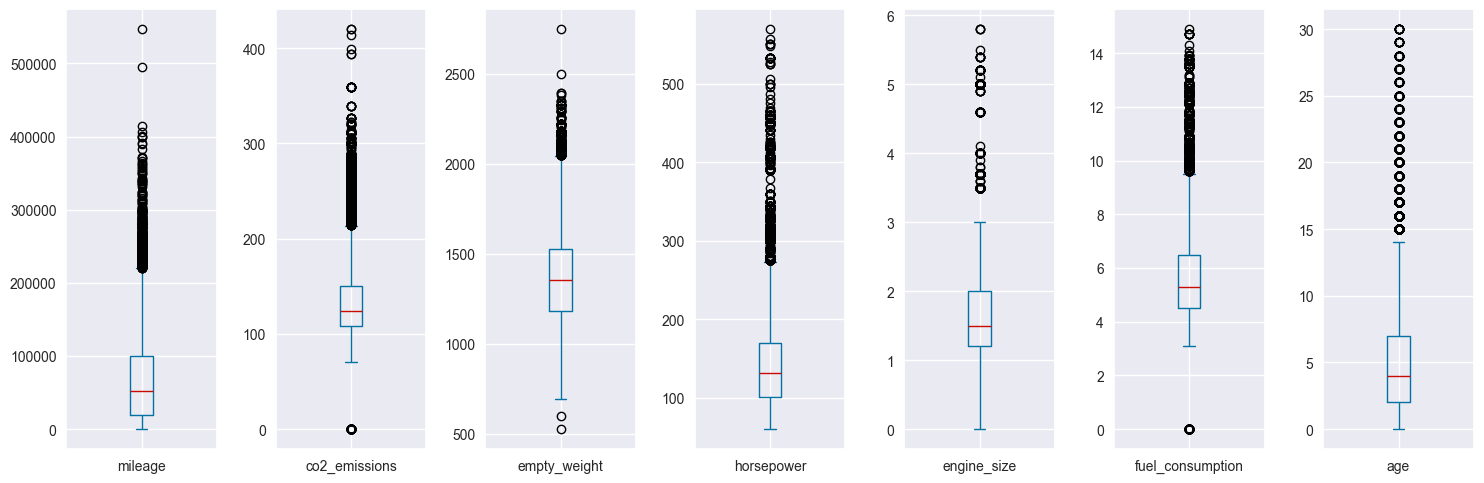

In [210]:
df[['mileage', 'co2_emissions', 'empty_weight', 'horsepower', 
    'engine_size', 'fuel_consumption', 'age']].plot(kind='box', subplots=True, figsize=(15,5))

plt.tight_layout()
plt.show()

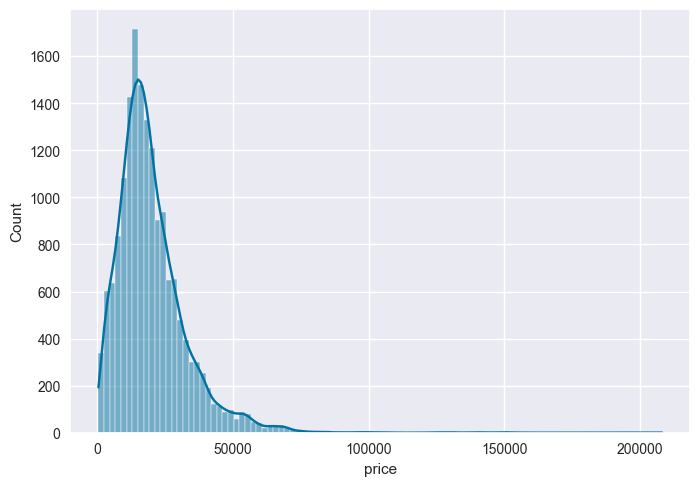

In [211]:
sns.histplot(df.price, bins=100, kde=True);

Linear models are sensitive to outliers. In machine learning, an "outlier" can also refer to data points belonging to groups with insufficient representation for effective training.

*   **Initial Observation:** A global histplot (e.g., for `price`) might show few data points in extreme ranges (e.g., cars > 70,000). This suggests these high-value segments *could* be ML outliers due to sparse data.
*   **Limitations of Global View:** Relying solely on global distributions for outlier detection can be misleading. What's an outlier overall might be typical within a specific subgroup.
*   **Contextual (Group-Based) Detection:** It's more effective to identify outliers by grouping the data (e.g., by `make_model` like 'Opel Astra', 'Ford Fiesta') and then examining distributions *within* those specific contexts.
*   **Experimental Validation:** The ultimate decision on handling potential outliers often requires an experimental approach: train the model both with and without these suspected outliers and compare performance scores to make an informed choice.

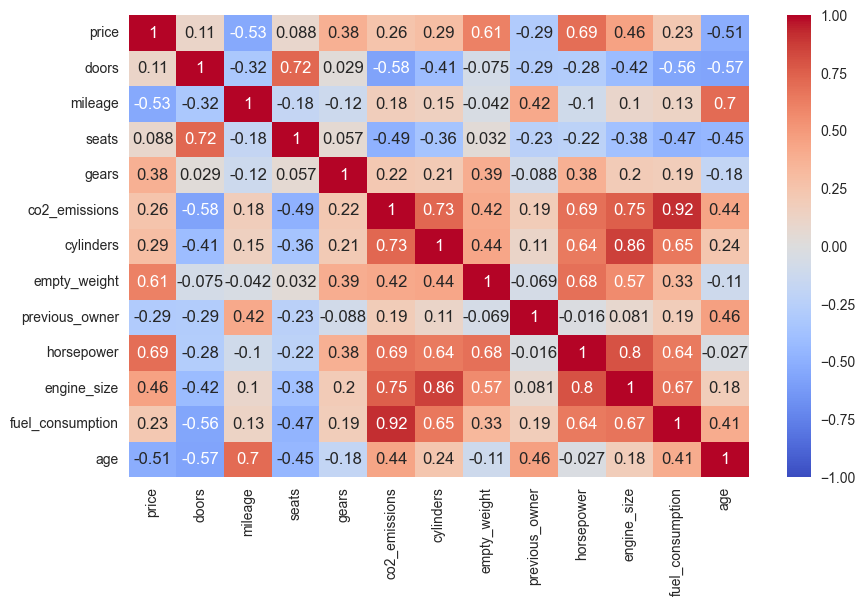

In [213]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

### VIF (Variance Inflation Factor) Score for Multicolliniearity

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [216]:
X_vif = df_numeric.drop(columns='price')
X_vif.head()

,doors,mileage,seats,gears,co2_emissions,cylinders,empty_weight,previous_owner,horsepower,engine_size,fuel_consumption,age
0,5.000,27150.000,5.000,6.000,120.000,4.000,1330.000,1.000,116.000,1.500,4.500,2.000
1,5.000,157500.000,5.000,6.000,138.000,4.000,1425.000,2.000,109.000,2.000,5.200,12.000
2,5.000,21734.000,5.000,7.000,120.000,4.000,1445.000,1.000,116.000,1.500,3.900,2.000
3,5.000,172700.000,5.000,7.000,102.500,4.000,1425.000,2.000,109.000,1.500,3.700,4.000
4,5.000,18989.000,5.000,7.000,120.000,4.000,1455.000,1.000,116.000,1.500,3.900,2.000


In [217]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns

In [218]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [240]:
df_vif

,features,VIF
0,doors,38.341
1,mileage,5.126
2,seats,95.908
3,gears,23.706
4,co2_emissions,102.250
5,cylinders,83.399
6,empty_weight,64.224
7,previous_owner,5.042
8,horsepower,22.445
9,engine_size,48.286


**Key Insights from VIF Scores:**

*   **Significant Multicollinearity Present:** Many features exhibit very high VIF scores, indicating strong multicollinearity.
*   **Problematic Features (Very High VIF >> 10):**
    *   `co2_emissions` (102.25)
    *   `seats` (95.9)
    *   `cylinders` (83.4)
    *   `empty_weight` (64.2)
    *   `fuel_consumption` (63.6)
    *   `engine_size` (48.3)
    *   `doors` (38.3)
    *   `gears` (23.7)
    *   `horsepower` (22.4)
    *   These high scores mean these variables are highly predictable by other variables in the model.
*   **Highly Interrelated Clusters:**
    *   **Engine Characteristics:** Features like `engine_size`, `cylinders`, `horsepower`, `co2_emissions`, and `fuel_consumption` are naturally highly correlated.
    *   **Vehicle Size/Capacity:** `empty_weight`, `seats`, and `doors` are also likely interlinked.
*   **Potentially Concerning Features (VIF 5-10):**
    *   `age` (7.2)
    *   `mileage` (5.1)
    *   `previous_owner` (5.0)
    *   These indicate moderate multicollinearity.
*   **Implication for Modeling:** Such high multicollinearity can make model coefficients unstable and difficult to interpret. It suggests that some features are redundant or that their individual effects are hard to disentangle. Feature selection, combination, or using models robust to multicollinearity (like Ridge regression) will be important.

### Outliers in Price Column

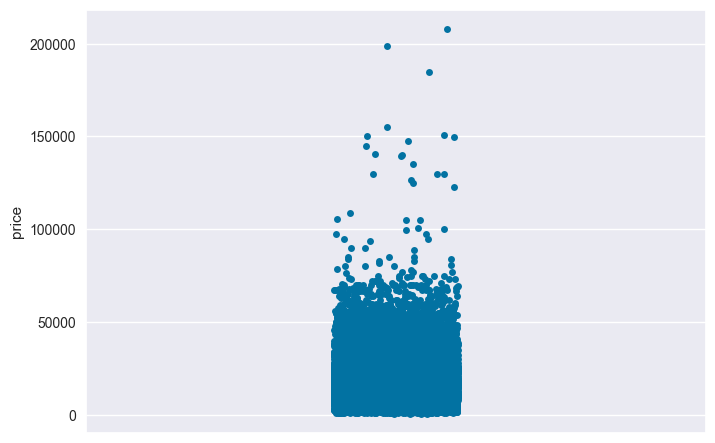

In [243]:
sns.stripplot(df.price);

In [245]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Mercedes-Benz A 180      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Corsa               : 15,    The rate of outliers : 0.043
 The count of outlier for Opel Astra               : 7 ,    The rate of outliers : 0.011
 The count of outlier for Opel Adam                : 1 ,    The rate of outliers : 0.009
 The count of outlier for Opel Insignia            : 18,    The rate of outliers : 0.063
 The count of outlier for Opel Cascada             : 1 ,    The rate of outliers : 0.008
 The count of outlier for Opel Grandland X         : 1 ,    The rate of outliers : 0.007
 The count of outlier for Renault Megane           : 32,    The rate of outliers : 0.038
 The count of outlier for Renault Clio             : 9 ,    The rate of outliers : 0.025
 The count of outlier for Renault Captur           : 0 ,    The rate of outliers : 0.0
 The count of outlier for Renault Talisman         : 5 ,    The rate of outliers : 0.038
 The count of outlier for

*   **Observation:** Statistical methods flagged 364 outliers, a very small fraction (0.022%) of the dataset.
*   **Approach:** Before outright removal, a Linear Regression model will be trained with these outliers included.
*   **Rationale:** This will help assess their *actual influence* on the model and pinpoint genuinely problematic areas, rather than acting solely on statistical definitions.

### Data Pre-Processing

To prepare our dataset for machine learning, we'll perform the following preprocessing steps:

1.  **Encoding Categorical Features:**
    *   **Nominal Categories:** Features with no inherent order (e.g., `make_model`, `body_type`) will be converted into numerical format using **One-Hot Encoding**. This creates new binary (0 or 1) columns for each category.
    *   **Ordinal Categories:** Features with a meaningful order (e.g., 'Low', 'Medium', 'High' for binned packages) will be converted using **Ordinal Encoding**, assigning a numerical value based on their rank.
    *   We'll use `ColumnTransformer` from `scikit-learn` to apply these encoding strategies efficiently to the appropriate columns.

2.  **Scaling Numerical Features:**
    *   All numerical features (including those newly created by encoding) will be scaled to a common range, typically between 0 and 1.
    *   This will be done using `MinMaxScaler` from `scikit-learn`, which helps ensure that no single feature dominates the model due to its scale.

These steps transform our diverse dataset into a purely numerical format suitable for training machine learning models like Linear Regression.

In [247]:
from sklearn.model_selection import train_test_split

X= df.drop(columns="price")
y= df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
df_object.head(1)

,make_model,body_type,type,gearbox,fuel_type,paint,seller,drivetrain,upholstery,comfort_package,media_package,safety_package,extras_package
0,Mercedes-Benz A 180,Compact,Used,Manual,Diesel,Metallic,Dealer,Front,Leather,Premium,Premium,Deluxe,Premium


In [251]:
cat_onehot = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'paint', 'seller', 'drivetrain',
              'upholstery']
cat_ordinal = ['type', 'comfort_package', 'media_package', 'safety_package', 'extras_package']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Deluxe']
cat_for_ent = ['Standard', 'Premium', 'Deluxe']
cat_for_safety = ['Standard', 'Premium', 'Deluxe']
cat_for_extras = ['Standard', 'Premium', 'Deluxe']

In [253]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_type,
                                                     cat_for_comfort,
                                                     cat_for_ent,
                                                     cat_for_safety,
                                                     cat_for_extras]),cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [255]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [257]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

### Implementing Linear Regression Model

In [259]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : root_mean_squared_error(y_train, y_train_pred),
    "mape" :mean_absolute_percentage_error(y_train, y_train_pred)},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : root_mean_squared_error(y_test, y_pred),
    "mape" :mean_absolute_percentage_error(y_test, y_pred)}}

    return pd.DataFrame(scores)

In [261]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [263]:
pd.options.display.float_format = '{:.3f}'.format
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.837,0.840
mae,2981.848,3032.479
mse,27716954.163,27598278.445
rmse,5264.689,5253.406
mape,0.237,0.230


In [265]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

y_pred = lm.predict(X_test_scaled)

adj_r2(y_test, y_pred, X_test_scaled)

0.8342323078322978

### Cross Validation

In [267]:
from sklearn.model_selection import cross_validate

In [269]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True,
                       )

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.839
train_r2                                           0.838
test_neg_mean_absolute_error                   -3013.724
train_neg_mean_absolute_error                  -2981.745
test_neg_mean_squared_error                -28412750.608
train_neg_mean_squared_error               -27680684.096
test_neg_root_mean_squared_error               -5224.211
train_neg_root_mean_squared_error              -5259.613
test_neg_mean_absolute_percentage_error           -0.239
train_neg_mean_absolute_percentage_error          -0.237
dtype: float64

### Initial Thoughts On Linear Regression Model Performance

The first Linear Regression model shows promising results as a baseline:

*   **Good Predictive Power:** An R² of **0.840** and an Adjusted R² of approximately **0.834** on the test set indicate the model explains a significant portion (around 84%) of the variance in car prices using the selected features.
*   **Error Magnitude:**
    *   The Mean Absolute Error (MAE) on the test set is approximately **3,032**, meaning, on average, the predictions are off by this amount.
    *   The Root Mean Squared Error (RMSE) is around **5,253**, indicating that while the average error is moderate, some larger errors do occur.
    *   The Mean Absolute Percentage Error (MAPE) of **23.0%** on the test set gives a relative sense of the prediction error.
*   **Excellent Generalization (Confirmed by Cross-Validation):** The cross-validation results further strengthen the conclusion that the model generalizes well. The performance metrics (R², MAE, RMSE, MAPE, noting that error metrics are negative here as per `sklearn`'s convention for maximization) are consistently very close between the average training folds and the average testing folds. For instance, an average test R² of **0.839** is nearly identical to the average train R² of **0.838**. This consistency across multiple data splits indicates that the model is robust and not significantly overfitting to any particular subset of the training data.

Overall, these scores provide a solid starting point. While there's room for improvement (e.g., reducing the error metrics), the model has learned meaningful patterns from the data.

### Visualization of Errors

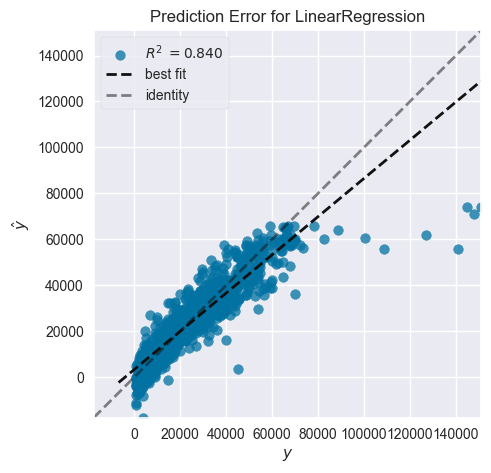

In [272]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

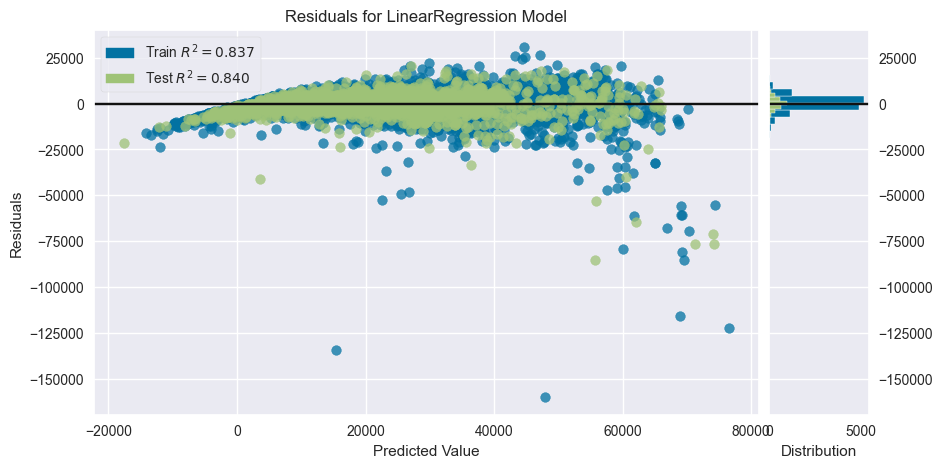

In [274]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

To improve model focus and address performance inconsistencies observed in the diagnostic plots, we will filter the price range:

*   **Dropping Prices Over 70,000:**
    *   **Prediction Error Plot:** Shows increased scatter and a tendency for the model to underpredict actual prices in this higher range. The `best fit` line deviates more from the `identity` line.
    *   **Residuals Plot:** Exhibits significant heteroscedasticity (fanning out of residuals) for predicted values corresponding to higher actual prices. Residuals are larger and more spread out, indicating less reliable predictions. This segment has fewer data points, making it harder for a linear model to capture patterns accurately.

*   **Dropping Prices Below 7500:**
    *   **Prediction Error Plot:** While less dramatically problematic than the high end, the cluster of points at the very low end (e.g., < 7500) shows some spread and contributes to the overall error. These very low-priced cars might represent a distinct market segment (e.g., very old, high mileage, poor condition) with different pricing dynamics that the current model struggles to capture precisely within the broader dataset.
    *   **Residuals Plot:** Shows a dense cluster of residuals near zero for low predicted values, but also some noticeable deviations, suggesting the model isn't perfectly capturing this segment either.

**Goal:** By focusing the model on the 7,500 - 70,000 price range, where the data is denser and the linear relationships appear more consistent, we aim to improve model performance and reliability within this more common market segment.

### Filtering Data and Rebuilding The Model

In [277]:
df = df[(df.price > 7500)&(df.price <70000)]

In [279]:
df.to_csv('car_project_deployment.csv', index=False)

In [281]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [283]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)

In [285]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [289]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.883,0.875
mae,2641.802,2628.953
mse,14571763.017,14310001.875
rmse,3817.298,3782.856
mape,0.134,0.135


In [291]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.879
train_r2                                           0.883
test_neg_mean_absolute_error                   -2669.751
train_neg_mean_absolute_error                  -2640.745
test_neg_mean_squared_error                -14928787.669
train_neg_mean_squared_error               -14553351.655
test_neg_root_mean_squared_error               -3862.673
train_neg_root_mean_squared_error              -3814.870
test_neg_mean_absolute_percentage_error           -0.136
train_neg_mean_absolute_percentage_error          -0.134
dtype: float64

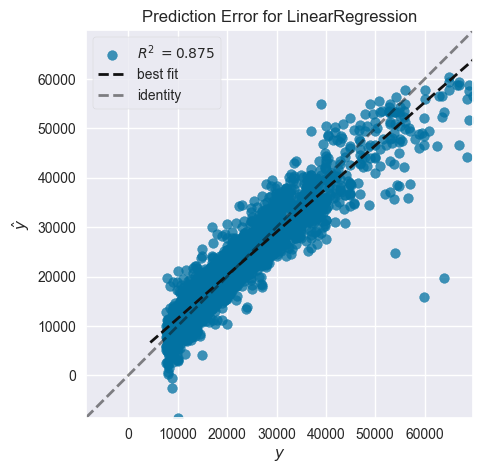

In [293]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

The decision to filter the price range has yielded **significant improvements** across all performance metrics for the Linear Regression model:

*   **Substantially Improved Predictive Power:**
    *   The **R²** on the test set has increased notably to **0.875** (and cross-validation shows a consistent **0.879**). This means the model now explains approximately 88% of the variance in car prices within the filtered range, a marked improvement over the previous ~84%.
*   **Reduced Prediction Errors:**
    *   **MAE (Mean Absolute Error):** Decreased to approximately **2,628** on the test set (cross-validation ~2,669). This is a reduction of about 400 in the average prediction error.
    *   **RMSE (Root Mean Squared Error):** Showed a substantial drop to around **3,782** on the test set (cross-validation ~3,862), down from over 5,200. This indicates that the impact of very large errors has been considerably reduced.
    *   **MAPE (Mean Absolute Percentage Error):** Improved significantly to **13.5%** on the test set (cross-validation ~13.6%), down from 23%. This suggests the predictions are now, on average, much closer proportionally to the actual prices.
*   **Continued Excellent Generalization:**
    *   The performance metrics remain remarkably consistent between the training and testing sets, as well as across the cross-validation folds. This confirms that the model continues to generalize very well to unseen data and is not overfitting, even after focusing on a more specific segment of the market.

**Conclusion:**
Filtering the price range to focus on the 7,500 - 70,000 segment has proven to be a highly effective strategy. It has led to a more accurate and reliable model, demonstrating that removing extreme price points where linear relationships may not hold as well (or where data is sparse) can substantially enhance the performance of a Linear Regression model for the core market segment.

In [296]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = root_mean_squared_error(y_test, y_pred)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

### Implementing Ridge Regression

In [298]:
from sklearn.linear_model import Ridge

In [300]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [302]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.882,0.875
mae,2641.691,2627.996
mse,14580747.078,14302486.412
rmse,3818.474,3781.863
mape,0.134,0.134


### Hyperparameter Optimization For Ridge Model

In [304]:
from sklearn.model_selection import GridSearchCV

In [306]:
param_grid = {'alpha' : np.linspace(0.001, 100, 100)}

ridge_grid_model = GridSearchCV(estimator=Ridge(),
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

ridge_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.01109091e+00, 2.02118182e+00, 3.03127273e+00,
       4.04136364e+00, 5.05145455e+00, 6.06154545e+00, 7.07163636e+00,
       8.08172727e+00, 9.09181818e+00, 1.01019091e+01, 1.11120000e+01,
       1.21220909e+01, 1.31321818e+01, 1.41422727e+01, 1.51523636e+01,
       1.61624545e+01, 1.71725455e+01, 1.8182...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [308]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.882,0.875
mae,2641.695,2627.997
mse,14580922.154,14302597.079
rmse,3818.497,3781.877
mape,0.134,0.134


In [310]:
ridge_grid_model.best_params_

{'alpha': 1.011090909090909}

In [312]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = root_mean_squared_error(y_test, y_pred)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

### Implementing Lasso Regression

In [314]:
from sklearn.linear_model import Lasso

In [316]:
## Lasso works better with Standard Scaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform='pandas')
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

In [318]:
lasso_model = Lasso()

lasso_model.fit(X_train_scaled2, y_train)

Lasso()

In [320]:
train_val(lasso_model, X_train_scaled2, y_train, X_test_scaled2, y_test)

,train,test
R2,0.883,0.875
mae,2641.497,2628.804
mse,14572148.012,14314993.134
rmse,3817.348,3783.516
mape,0.134,0.135


### Hyperparameter Optimization for Lasso Model

In [322]:
param_grid = {'alpha': np.linspace(0.1, 10, 20)}

lasso_grid_model = GridSearchCV(estimator=Lasso(max_iter=10000),
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

lasso_grid_model.fit(X_train_scaled2, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000), n_jobs=-1,
             param_grid={'alpha': array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [324]:
train_val(lasso_grid_model, X_train_scaled2, y_train, X_test_scaled2, y_test)

,train,test
R2,0.883,0.875
mae,2641.009,2628.458
mse,14574455.044,14324543.688
rmse,3817.650,3784.778
mape,0.134,0.135


In [326]:
lasso_grid_model.best_params_

{'alpha': 2.7052631578947373}

After hyperparameter tuning (optimizing alpha values using GridSearchCV), both Ridge and Lasso regression models were evaluated:

*   **Ridge Regression (Optimized):**
    *   Test R²: 0.875
    *   Test MAE: 2627.997
    *   Test RMSE: 3781.877
    *   Test MAPE: 13.4%
*   **Lasso Regression (Optimized):**
    *   Test R²: 0.875
    *   Test MAE: 2628.458
    *   Test RMSE: 3784.778
    *   Test MAPE: 13.5%

**Conclusion:**

Both the optimized Ridge and Lasso regression models achieve **virtually identical performance** on the test set. They exhibit strong predictive power (R² ~0.875) and very similar error metrics. The regularization applied by both models effectively managed multicollinearity without sacrificing predictive accuracy compared to the initial linear model on the filtered data. Given their near-identical scores, either model would be a good choice. Lasso's tendency to perform feature selection (by shrinking some coefficients to zero) might offer a slightly simpler model if interpretability of the most impactful features is a key concern, but in terms of pure predictive performance, they are interchangeable here.

In [329]:
y_pred = lasso_grid_model.predict(X_test_scaled2)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = root_mean_squared_error(y_test, y_pred)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

### Feature Importance & Re-modelling

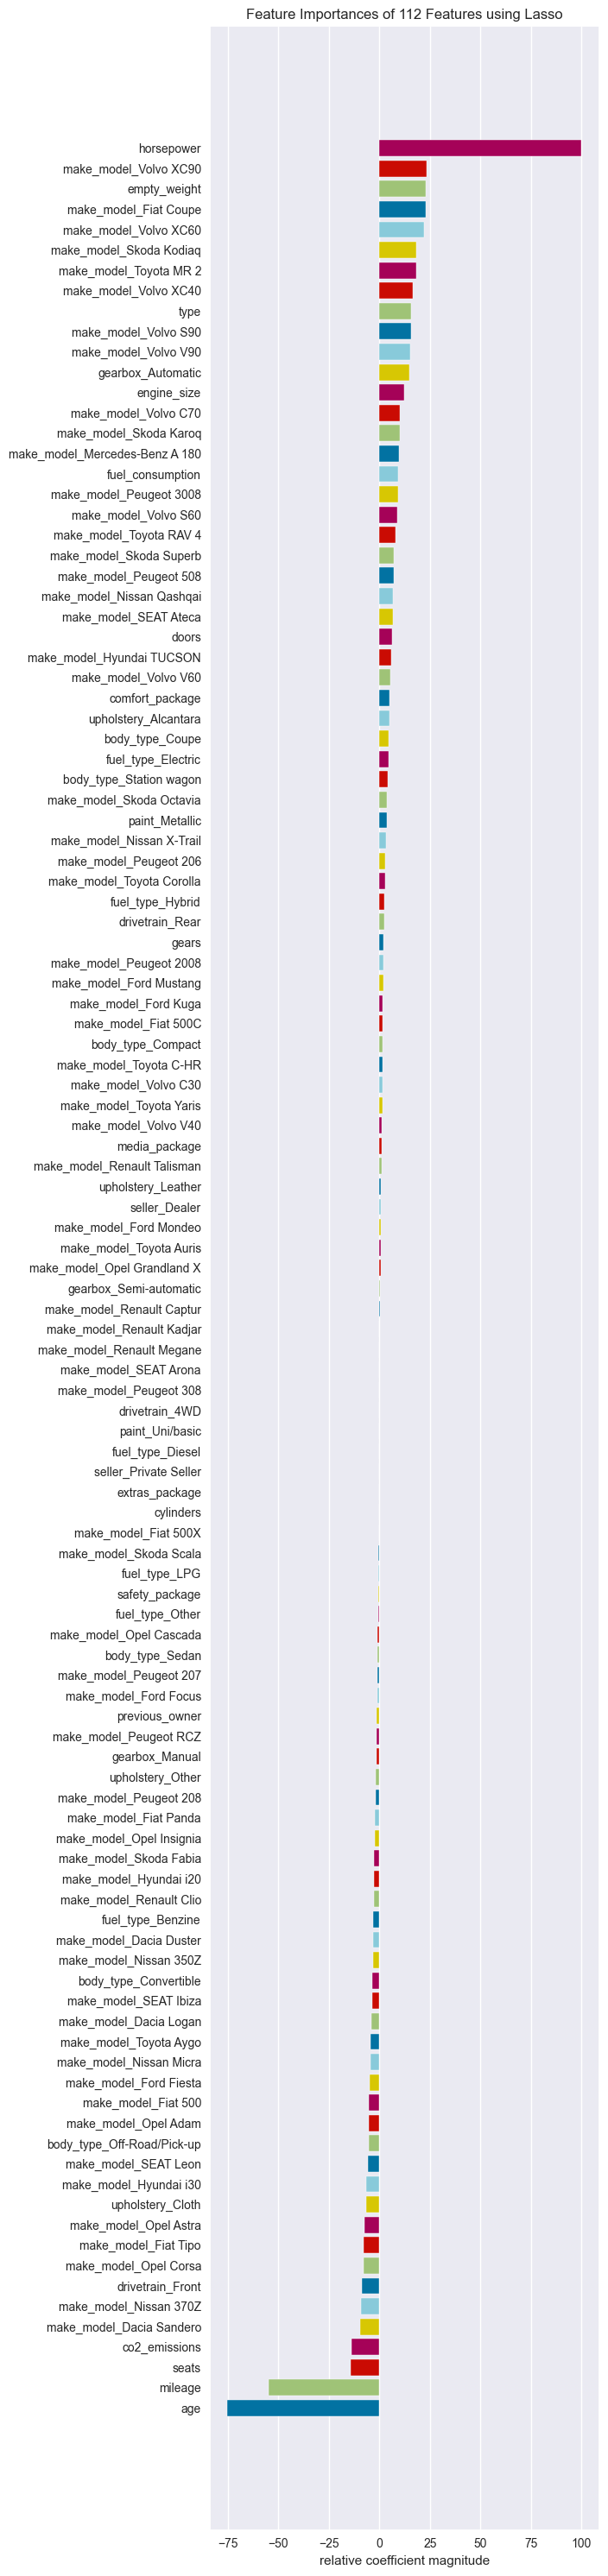

<Axes: title={'center': 'Feature Importances of 112 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [331]:
from yellowbrick.model_selection import FeatureImportances

model = lasso_grid_model.best_estimator_

viz = FeatureImportances(model,
                         labels=X_train_scaled2.columns)

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled2, y_train)
viz.show()

In [333]:
df_new = df[["make_model", "horsepower", "mileage","age", "engine_size", "type", "empty_weight", "price"]]

df_new.head()

,make_model,horsepower,mileage,age,engine_size,type,empty_weight,price
0,Mercedes-Benz A 180,116.000,27150.000,2.000,1.500,Used,1330.000,24400.000
2,Mercedes-Benz A 180,116.000,21734.000,2.000,1.500,Used,1445.000,29800.000
3,Mercedes-Benz A 180,109.000,172700.000,4.000,1.500,Used,1425.000,21000.000
4,Mercedes-Benz A 180,116.000,18989.000,2.000,1.500,Used,1455.000,26800.000
5,Mercedes-Benz A 180,136.000,25.000,1.000,1.300,Pre-registered,1350.000,32900.000


In [335]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform='pandas')

In [341]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [343]:
scaler_new = StandardScaler().set_output(transform='pandas')

X_train = scaler_new.fit_transform(X_train)
X_test = scaler_new.transform(X_test)

In [345]:
lasso_final_model = Lasso(alpha=2.7052631578947373)

lasso_final_model.fit(X_train, y_train)

train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.872,0.863
mae,2789.388,2759.279
mse,15882342.972,15783044.459
rmse,3985.266,3972.788
mape,0.142,0.141


In [347]:
model = Lasso(alpha = 4.268421052631579)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.869
train_r2                                           0.872
test_neg_mean_absolute_error                   -2810.359
train_neg_mean_absolute_error                  -2788.626
test_neg_mean_squared_error                -16133153.240
train_neg_mean_squared_error               -15870834.983
test_neg_root_mean_squared_error               -4015.668
train_neg_root_mean_squared_error              -3983.809
test_neg_mean_absolute_percentage_error           -0.143
train_neg_mean_absolute_percentage_error          -0.142
dtype: float64

In [349]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = root_mean_squared_error(y_test, y_pred)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

### Visual Comparison of Models

In [351]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, fm_mape]})
compare

,Model,r2_score,mae,rmse,mape
0,linear_m,0.875,2628.953,3782.856,0.135
1,ridge_m,0.875,2627.997,3781.877,0.134
2,lasso_m,0.875,2628.458,3784.778,0.135
3,final_m,0.863,2759.279,3972.788,0.141


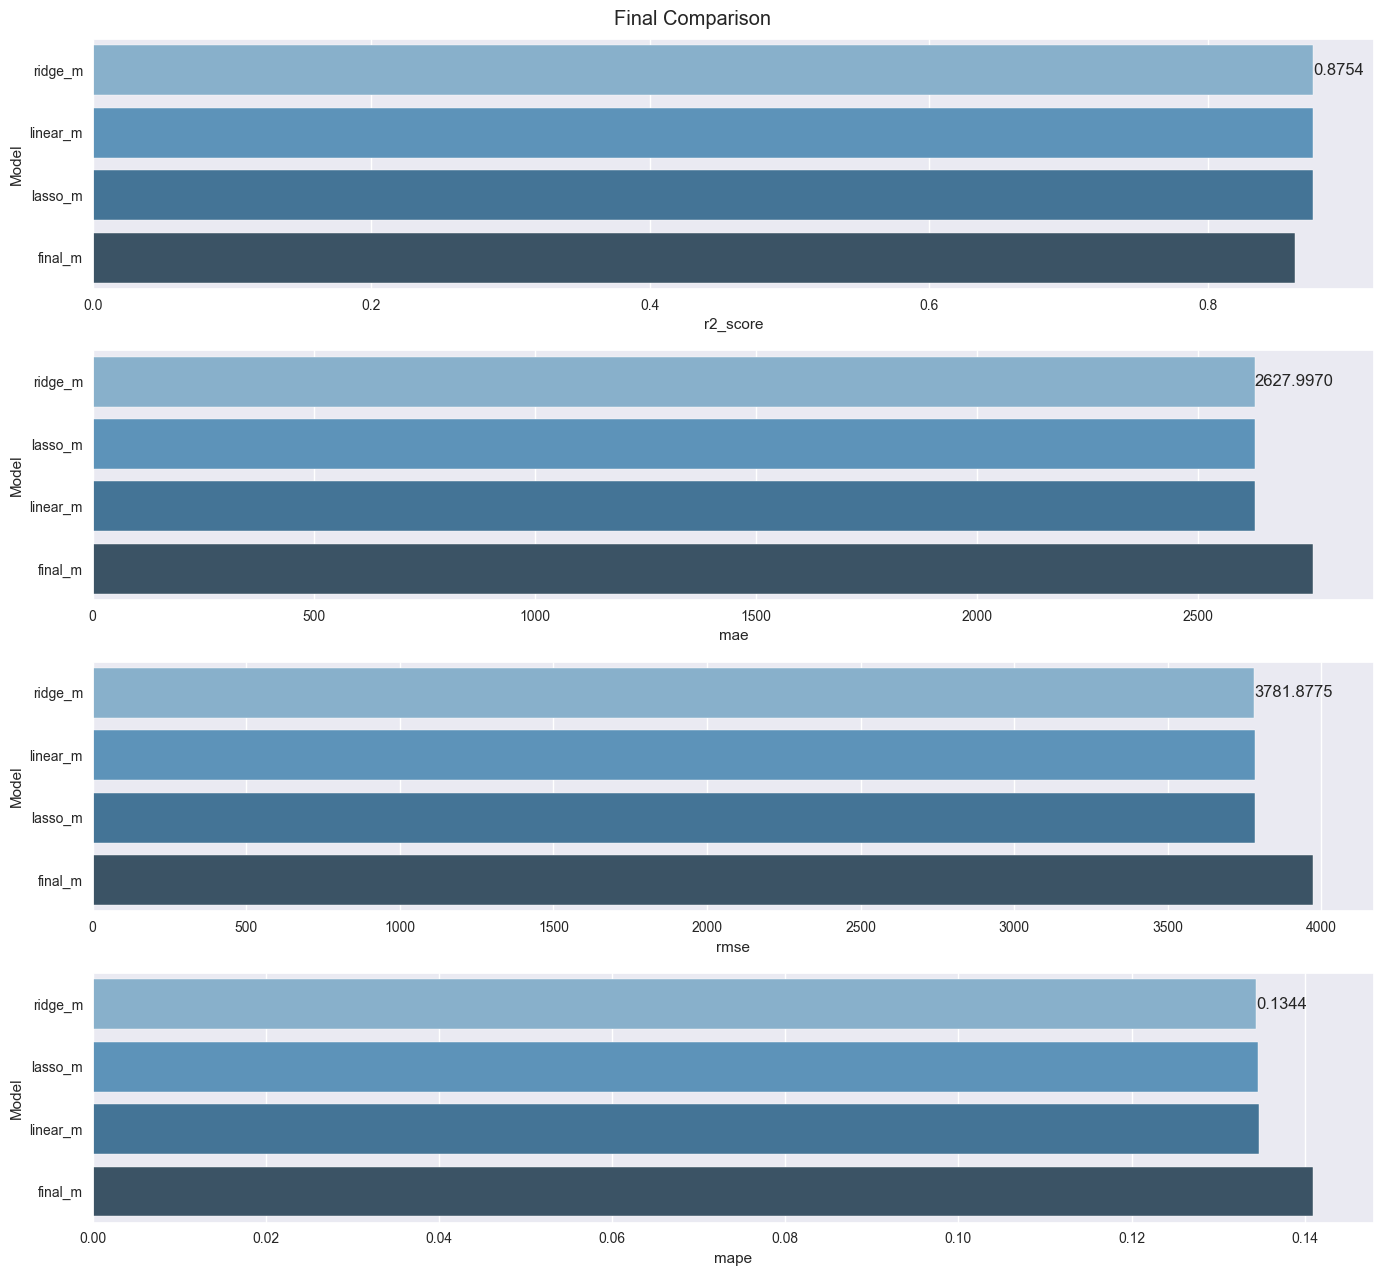

In [353]:
plt.figure(figsize=(14,13))
plt.suptitle('Final Comparison')

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.tight_layout()
plt.show()

#### Final Model Comparison & Conclusion

The evaluation of our Linear Regression, optimized Ridge, optimized Lasso, and a final Lasso model using only the top 7 most impactful features reveals several key insights:

1.  **Overall High Performance:** All models demonstrate strong predictive capabilities, with the full-feature Linear, Ridge, and Lasso models achieving nearly identical R² scores around **0.875** and very similar error metrics (MAE ~2628, RMSE ~3781-3784, MAPE ~13.5%). This suggests that after data filtering and preprocessing, the basic linear relationship is well-captured, and regularization (Ridge/Lasso) primarily helped manage multicollinearity without a dramatic change in predictive outcomes for this specific dataset.

2.  **Impact of Feature Selection (`final_m`):**
    *   The `final_m` (Lasso with top 7 features) shows a **slight decrease in performance** compared to the models using all features. Its R² is marginally lower, and error metrics (MAE, RMSE, MAPE) are slightly higher, as seen in the plots where its bars are a little shorter for R² and a little longer for errors.
    *   However, the crucial takeaway is that this simplified model **retains a very high degree of predictive power**. The performance drop is minimal, indicating that these top 7 features capture the vast majority of the information relevant to price prediction.

3.  **Choosing the Best Model:**
    *   If maximizing every fraction of a performance metric is the sole objective, any of the full-feature Linear, Ridge, or Lasso models would be suitable given their near-identical results.
    *   However, the **`final_m` (Lasso with top 7 features) presents a compelling case as the preferred model.** The slight trade-off in predictive accuracy is likely outweighed by its significant benefits in terms of:
        *   **Simplicity and Interpretability:** A model with fewer features is easier to understand, explain, and maintain.
        *   **Reduced Overfitting Risk (though not prominent here):** Simpler models are generally less prone to overfitting, although all models showed good generalization.
        *   **Efficiency:** While less critical for linear models, fewer features mean faster predictions.

4.  **Utility for Streamlit Deployment:**
    *   The feature selection achieved with the `final_m` is particularly advantageous for the final project goal of creating a Streamlit car price prediction module. A model requiring way fewer inputs will result in a **simpler, more user-friendly interface** for the end-user, enhancing the practicality and usability of the deployed application.